First we will import all the necessary libraries

In [35]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

#Biopython for Fasta file processing
from Bio import SeqIO

#Tensorflow and Keras for deep learning
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, Embedding, BatchNormalization, GlobalMaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Scikit-learn for preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras import Input

# Utility Libraries
import os
import random

Following is the code for k-mer encoding which comes under preprocessing of data obtained from the fasta files.

In [68]:
# NUCLEOTIDES = {'A', 'C', 'G', 'T'}

# def clean_sequence(seq):
#     """Remove invalid characters from the DNA sequence."""
#     return ''.join(nuc for nuc in seq if nuc in NUCLEOTIDES)

# def kmer_count(sequence, k):
#     """Count k-mers in a given DNA sequence and return a NumPy array of counts."""
#     sequence = clean_sequence(sequence)
#     n = len(sequence)
#     kmer_counts = np.zeros((4 ** k,), dtype=int)

#     # Generate k-mer indices using itertools.product only once
#     kmer_index = {''.join(p): idx for idx, p in enumerate(itertools.product('ACGT', repeat=k))}
    
#     # Count k-mers
#     for i in range(n - k + 1):
#         kmer = sequence[i:i + k]
#         if kmer in kmer_index:
#             kmer_counts[kmer_index[kmer]] += 1
            
#     return kmer_counts

# def encode_top_kmers(fasta_file, k, top_n=2):
#     """Encode only the top N sequences from a FASTA file into k-mer counts."""
#     kmer_features = []

#     for i, seq_record in enumerate(SeqIO.parse(fasta_file, "fasta")):
#         if i >= top_n:  
#             break
#         sequence = str(seq_record.seq)
#         kmer_counts = kmer_count(sequence, k)
#         kmer_features.append(kmer_counts)

#     return np.array(kmer_features)  # Return only kmer features

# def vectorize_kmers(kmer_features, all_possible_kmers):
#     """
#     Convert k-mer feature counts into a DataFrame with all possible k-mers as columns.
#     Handles cases where kmer_features is a list of dictionaries or sparse input.
#     """
#     # Convert kmer_features into a DataFrame
#     if isinstance(kmer_features, list) and isinstance(kmer_features[0], dict):
#         # Assume sparse input, convert to DataFrame
#         kmer_df = pd.DataFrame(kmer_features).fillna(0)
#         # Reorder columns to match all_possible_kmers
#         kmer_df = kmer_df.reindex(columns=all_possible_kmers, fill_value=0)
#     else:
#         # Assume dense input (2D array-like)
#         kmer_df = pd.DataFrame(kmer_features, columns=all_possible_kmers)
    
#     return kmer_df

# # Function to append sequences 21-30 to the existing CSV file
# def append_kmer_features_to_csv(fasta_file, k, start_seq=21, end_seq=30, output_dir="kmer_features_csv"):
#     # Generate all possible k-mers of length k
#     all_possible_kmers = [''.join(p) for p in itertools.product('ACGT', repeat=k)]
    
#     # Process sequences 21-30 from the FASTA file
#     kmer_features = []
#     for i, seq_record in enumerate(SeqIO.parse(fasta_file, "fasta")):
#         if i < start_seq - 1:
#             continue
#         if i >= end_seq:
#             break
#         sequence = str(seq_record.seq)
#         kmer_counts = kmer_count(sequence, k)
#         kmer_features.append(kmer_counts)
    
#     # Convert to DataFrame
#     new_kmer_df = vectorize_kmers(kmer_features, all_possible_kmers)
    
#     # Load existing CSV file
#     base_name = os.path.splitext(os.path.basename(fasta_file))[0]
#     output_csv = os.path.join(output_dir, f"{base_name}_kmer_features.csv")
#     if os.path.exists(output_csv):
#         existing_df = pd.read_csv(output_csv)
#     else:
#         raise FileNotFoundError(f"CSV file {output_csv} does not exist.")
    
#     # Append new data
#     updated_df = pd.concat([existing_df, new_kmer_df], ignore_index=True)
    
#     # Save back to the CSV
#     updated_df.to_csv(output_csv, index=False)
#     print(f"Appended sequences {start_seq}-{end_seq} for {fasta_file} to {output_csv}")


# # Parameters
# k = 4
# fasta_files = ["Chimpanzee.fa"]
# output_dir = "kmer_features_csv"

# # Process each FASTA file and append sequences 21-30
# for fasta_file in fasta_files:
#     try:
#         append_kmer_features_to_csv(fasta_file, k, start_seq=50001, end_seq=10000000, output_dir=output_dir)
#     except Exception as e:
#         print(f"Error processing {fasta_file}: {e}")


# Generate all possible k-mers of length k
# k = 4
# all_possible_kmers = [''.join(p) for p in itertools.product('ACGT', repeat=k)]

# Example usage with increased top_n
# fasta_files = ["Human.fa", "Chimpanzee.fa", "Mouse.fa", "FruitFly.fa", "Fungus.fa"]
# top_n = 20

# # Directory to store the output CSV files
# output_dir = "kmer_features_csv"
# os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# # Process each FASTA file and save the features to CSV
# for fasta_file in fasta_files:
#     try:
#         kmer_features = encode_top_kmers(fasta_file, k, top_n)
#         vectorized_features = vectorize_kmers(kmer_features, all_possible_kmers)
        
#         # Construct output file name
#         base_name = os.path.splitext(os.path.basename(fasta_file))[0]
#         output_csv = os.path.join(output_dir, f"{base_name}_kmer_features.csv")
        
#         # Save the DataFrame to a CSV file
#         vectorized_features.to_csv(output_csv, index=False)
        
#         print(f"Vectorized features for {fasta_file} saved to {output_csv}")
#     except Exception as e:
#         print(f"Error processing {fasta_file}: {e}")


Error processing Chimpanzee.fa: list index out of range


Now, we will convert the kmer features into a consistent format, that is vectorize the kmers and then we will split the data for training and testing the model

In [62]:
# Species-to-label mapping
species_labels = {
    'Homo sapiens': 0,
    'Pan troglodytes': 1,
    'Mus musculus': 2,
    'Drosophila melanogaster': 3,
    'Saccharomyces cerevisiae': 4  
}

# Paths to precomputed CSV files
csv_files = {
    'Homo sapiens': "kmer_features_csv/Human_kmer_features.csv",
    'Pan troglodytes': "kmer_features_csv/Chimpanzee_kmer_features.csv",
    'Mus musculus': "kmer_features_csv/Mouse_kmer_features.csv",
    'Drosophila melanogaster': "kmer_features_csv/FruitFly_kmer_features.csv",
    'Saccharomyces cerevisiae': "kmer_features_csv/Fungus_kmer_features.csv"
}

# Combine features and labels
vectorized_features = []
labels = []

for species, file_path in csv_files.items():
    # Load k-mer features from CSV
    species_features = pd.read_csv(file_path)
    print(f"{species}: Loaded {species_features.shape[0]} rows from {file_path}")
    
    # Add features to the combined list
    vectorized_features.append(species_features)
    
    # Generate corresponding labels
    labels.extend([species_labels[species]] * len(species_features))

# Concatenate all features into a single DataFrame
vectorized_features = pd.concat(vectorized_features, ignore_index=True)

# Sanity check: Features and labels must match
print("Shape of vectorized_features:", vectorized_features.shape)
print("Length of labels:", len(labels))

if vectorized_features.shape[0] != len(labels):
    raise ValueError("Mismatch between the number of features and labels!")

Homo sapiens: Loaded 706 rows from kmer_features_csv/Human_kmer_features.csv
Pan troglodytes: Loaded 999 rows from kmer_features_csv/Chimpanzee_kmer_features.csv
Mus musculus: Loaded 61 rows from kmer_features_csv/Mouse_kmer_features.csv
Drosophila melanogaster: Loaded 1870 rows from kmer_features_csv/FruitFly_kmer_features.csv
Saccharomyces cerevisiae: Loaded 17 rows from kmer_features_csv/Fungus_kmer_features.csv
Shape of vectorized_features: (3653, 256)
Length of labels: 3653


CNN model code

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 721ms/step - accuracy: 0.3346 - loss: 4.1043 - val_accuracy: 0.4727 - val_loss: 3.7249 - learning_rate: 1.0000e-04
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 759ms/step - accuracy: 0.4840 - loss: 3.6228 - val_accuracy: 0.6326 - val_loss: 3.3314 - learning_rate: 1.0000e-04
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 737ms/step - accuracy: 0.5259 - loss: 3.2670 - val_accuracy: 0.6449 - val_loss: 2.9731 - learning_rate: 1.0000e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 739ms/step - accuracy: 0.6072 - loss: 2.9911 - val_accuracy: 0.7086 - val_loss: 2.7766 - learning_rate: 1.0000e-04
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 743ms/step - accuracy: 0.6242 - loss: 2.7924 - val_accuracy: 0.6802 - val_loss: 2.6472 - learning_rate: 1.0000e-04
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 733ms/step - accuracy: 0.6545 - loss: 2.6551 - val_accuracy: 0.4952 - val_loss: 2.8311 - learning_rate: 1.0000e-04
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 738ms/step - acc

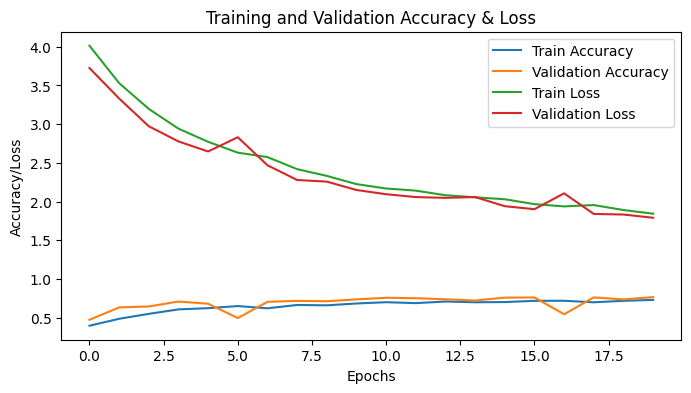

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LayerNormalization, Bidirectional, LSTM, Attention, GlobalAveragePooling1D, Dense, Dropout, Add, Cropping1D, MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

# Assuming `vectorized_features` and `labels` are your feature and target datasets
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(vectorized_features)

# Data Augmentation (SMOTE for imbalanced data)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, labels)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Reshape data to fit CNN (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# One-hot encode the labels
num_classes = len(np.unique(y_resampled))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Class weights for imbalanced dataset
class_weights = compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_dict = dict(enumerate(class_weights))

# Define the model architecture with enhancements
def create_refined_model(input_shape, num_classes):
    input_layer = Input(shape=input_shape)

    # Convolutional layers with L2 regularization and more filters
    conv1 = Conv1D(64, kernel_size=6, activation='relu', kernel_regularizer=l2(0.01))(input_layer)
    norm1 = LayerNormalization()(conv1)
    pool1 = MaxPooling1D(pool_size=2)(norm1)

    conv2 = Conv1D(128, kernel_size=8, activation='relu', kernel_regularizer=l2(0.01))(pool1)
    norm2 = LayerNormalization()(conv2)
    pool2 = MaxPooling1D(pool_size=2)(norm2)

    # Residual connection
    if pool1.shape[-1] != pool2.shape[-1]:
        pool1_aligned = Conv1D(filters=pool2.shape[-1], kernel_size=1, activation='linear')(pool1)
        pool2_aligned = pool2
    else:
        pool1_aligned, pool2_aligned = pool1, pool2

    # Align temporal dimensions
    if pool1_aligned.shape[1] > pool2_aligned.shape[1]:
        pool1_aligned = Cropping1D(cropping=(0, pool1_aligned.shape[1] - pool2_aligned.shape[1]))(pool1_aligned)
    elif pool1_aligned.shape[1] < pool2_aligned.shape[1]:
        pool2_aligned = Cropping1D(cropping=(0, pool2_aligned.shape[1] - pool1_aligned.shape[1]))(pool2_aligned)

    shortcut = Add()([pool1_aligned, pool2_aligned])

    # LSTM layers with dropout for regularization
    lstm_out = Bidirectional(LSTM(128, return_sequences=True, dropout=0.3))(shortcut)
    lstm_out = Bidirectional(LSTM(64, return_sequences=True, dropout=0.3))(lstm_out)

    # Attention mechanism with MultiHeadAttention
    attention = MultiHeadAttention(num_heads=4, key_dim=64)(lstm_out, lstm_out)

    # Global Average Pooling instead of Flatten
    gap = GlobalAveragePooling1D()(attention)

    # Fully connected layers with dropout
    dense1 = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(gap)
    dropout = Dropout(0.3)(dense1)
    output_layer = Dense(num_classes, activation='softmax')(dropout)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
input_shape = (X_train.shape[1], 1)
refined_model = create_refined_model(input_shape, num_classes)

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_refined_model.keras', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Learning rate scheduler with exponential decay
def lr_schedule(epoch):
    initial_lr = 1e-4
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * np.power(drop, np.floor((1 + epoch) / epochs_drop))
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
history = refined_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, checkpoint, reduce_lr, lr_scheduler],
    class_weight=class_weights_dict
)

# Evaluate the model
test_loss, test_accuracy = refined_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Evaluate using Precision, Recall, F1-Score
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(refined_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=[f'Species {i}' for i in range(num_classes)]))
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Plotting the training history
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Accuracy & Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.show()

Now, we will save the model. Following is the code for it.

In [73]:
# Save the entire model (architecture + weights)
refined_model.save('refined_model.h5')
